### 2b. Tangent, principal normal, binormal, curvature and torsion
*[Sch47/22,23]*


 **Problem.** The space curve $x=t, y=t^2, z=\frac{2}{3}t^3$ is given.
a) Find  equations for tangent, principal normal and binormal. b) Find those vectors at the point, where parameter t=1.5.  c) Find the curvature $\kappa $ and the radius of curvature $\rho$ at this point.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Theory.** A vector $\frac{d\vec{r}}{dt}$ is in the direction of the tangent.  The unit vector in this direction is the unit *tangent*  $\vec{T}$.

$$\vec{T}= \frac{d\vec{r}}{ds} = \frac{d\vec{r}/dt}{ds/dt} = \frac{d\vec{r}/dt}{|d\vec{r}/dt|} = \frac{d\vec{r}/dt}{\sqrt(d\vec{r}/dt \cdot d\vec{r}/ dt)} = \vec{v}/|\vec{v}|, $$ 
where $ds$ is is a lenght  element on the curve (t can be interpreted as time). *Principal normal* $\vec{N}$ and  the curvature $\kappa $ are obtained from the *Frenet-Serret* formula $$\frac{d\vec{T}}{ds} = \kappa\vec{N}.$$ It follows that $$ \vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|}  $$      and $$ \kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|}.$$

*Curvature*  $\kappa $ is the measure  of rate at wich the unit tangent $\vec{T}$ changes with respect to the lenght parameter *s*. *Radius of curvature* is $\rho = 1/\kappa $. *Binormal*  is the unit vector $$ \vec{B} = \vec{T} \times\vec{N}.$$  All three vectors are perpendicular to each other.


 *Torsion* $\tau $ is obtained from the *Frenet-Serret* formula $$\frac{d\vec{B}}{ds} = -\tau\vec{N}.$$


**--------------------------------------------------------------------------------------------------------------------------------------------------------**

  




In [1]:
# INIT
from sympy import *
from sympy.vector import CoordSys3D
t = symbols('t')                    # t is the parameter for the curve
C = CoordSys3D('C')                 # Defines a standard coordinate system

In [2]:
# INPUT
P = [t, t**2, (2/3*t**3)]           # Parametric curve                    

In [3]:
# CALCULATE EXPRESSIONS

# Unnormalized tangent vector to the curve at any point is the vector dr/dt.
r = P[0]*C.i + P[1]*C.j + P[2]*C.k  # Position vector to the points on the curve in CoordSys C
dr_dt = diff(r, t)                  # Derivation of r with respect to t gives dr/dt,  i.e...
dr_dt                               # the unnormalized tangent vector to the curve. If parameter 
                                    # t is time, then dr_dt is velocity (vector)

C.i + 2*t*C.j + 2.0*t**2*C.k

In [4]:
# |dr/dt|     (= ds/dt)
nrm_dr_dt = sqrt(dr_dt.dot(dr_dt))   # Dot product expression for the norm of dr/dt
nrm_dr_dt =factor(nrm_dr_dt)         # Simplifyis the expression
nrm_dr_dt                            # |dr/dt|

2.0*sqrt((1.0*t**2 + 0.5)**2)

In [5]:
# Unit tangent  (dr/dt)/|dr/dt|
T = dr_dt/nrm_dr_dt       
T                                    # Unit tangent

(0.5/sqrt((1.0*t**2 + 0.5)**2))*C.i + (1.0*t/sqrt((1.0*t**2 + 0.5)**2))*C.j + (1.0*t**2/sqrt((1.0*t**2 + 0.5)**2))*C.k

In [6]:
# Normal to the unit tangent T
dT_dt = diff(T, t) 
dT_dt                  #  Normal to the unit tangent T

(-1.0*t/((1.0*t**2 + 0.5)*sqrt((1.0*t**2 + 0.5)**2)))*C.i + (-2.0*t**2/((1.0*t**2 + 0.5)*sqrt((1.0*t**2 + 0.5)**2)) + 1.0/sqrt((1.0*t**2 + 0.5)**2))*C.j + (-2.0*t**3/((1.0*t**2 + 0.5)*sqrt((1.0*t**2 + 0.5)**2)) + 2.0*t/sqrt((1.0*t**2 + 0.5)**2))*C.k

For *Principal normal* $\vec{N}$ we need to calculate
$$\frac{d\vec{T}}{ds} = \frac{d\vec{T}/dt}{ds/dt} = \frac{d\vec{T}/dt}{|d\vec{r}/dt|} = \frac{d\vec{T}/dt}{\sqrt(d\vec{r}/dt \cdot d\vec{r}/ dt)}$$

In [7]:
# According to the last quotient of the previous equation:
dT_ds = simplify(dT_dt/nrm_dr_dt)
dT_ds                                 # Normal to the tangent T 

(-0.5*t/(1.0*t**2 + 0.5)**3)*C.i + ((0.25 - 0.5*t**2)/(1.0*t**2 + 0.5)**3)*C.j + (0.5*t/(1.0*t**2 + 0.5)**3)*C.k

In [8]:
# Confirm the orthogonality of dT/ds and T by showing that the dot product is zero.
simplify(T.dot(dT_ds))                 

0

In [9]:
# Curvature k = |dT/ds| 
k = simplify((sqrt(dT_ds.dot(dT_ds))))
k                                          # Curvature

0.707106781186548*sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)

In [10]:
# Principal Normal 
N = (1/k)*dT_ds
N

(-0.707106781186547*t/(sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)*(1.0*t**2 + 0.5)**3))*C.i + (1.41421356237309*(0.25 - 0.5*t**2)/(sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)*(1.0*t**2 + 0.5)**3))*C.j + (0.707106781186547*t/(sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)*(1.0*t**2 + 0.5)**3))*C.k

In [11]:
# Binormal B=TxN
B = simplify(T.cross(N))
B

(t**2*(0.707106781186547*t**2 + 0.353553390593274)/(sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)*(1.0*t**2 + 0.5)**3*sqrt((1.0*t**2 + 0.5)**2)))*C.i + (t*(-0.707106781186547*t**2 - 0.353553390593274)/(sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)*(1.0*t**2 + 0.5)**3*sqrt((1.0*t**2 + 0.5)**2)))*C.j + ((0.353553390593274*t**2 + 0.176776695296637)/(sqrt((t**2 + 0.5*(t**2 - 0.5)**2)/(1.0*t**2 + 0.5)**6)*(1.0*t**2 + 0.5)**3*sqrt((1.0*t**2 + 0.5)**2)))*C.k

In [12]:
# Torsion tau
dB_dt = diff(B, t) 
# dB/ds = (dB/dt)/(ds/dt) = dB/dt)/|dr/dt|     (ds/dt = |dr/dt|)
dB_ds = dB_dt/nrm_dr_dt                
# Torsion  tau = |dB/ds| 
tau = simplify((sqrt(dB_ds.dot(dB_ds))))            # Torsion


In [13]:
# Orthogonality check. All three vectors T, N and B are perpendicular 
# to each other, so their mutual dot products must be zero:
print(simplify(T.dot(N)))
print(simplify(T.dot(B)))
print(simplify(B.dot(N)))

0
0
0


In [14]:
# Unit vector check 
print(simplify(T.dot(T)))
print(simplify(N.dot(N)))
print(simplify(B.dot(B)))

1.00000000000000
1.00000000000000
1.00000000000000


**----------------------------------------------------------------------------------------------------------------------------------------------------**

**EVALUATIONS  with a fixed parameter value t = t0**

In [15]:
# INPUT               
t0 = 1.5                       # t=t0 defines a fixed point on the curve in the CoordSys C

In [16]:
# Vectors evaluated at t=t0
r0 = r.evalf(subs={t: t0 })    # Position vector
T0 = T.evalf(subs={t: t0})     # Unit tangent vector T
N0 = N.evalf(subs={t: t0})     # Principal normal N
B0 = B.evalf(subs={t: t0})     # Binormal B

print('r0 =',r0)
print('T0 =',T0)
print('N0 =',N0)
print('B0 =',B0)

r0 = 1.5*C.i + 2.25*C.j + 2.25*C.k
T0 = 0.181818181818182*C.i + 0.545454545454545*C.j + 0.818181818181818*C.k
N0 = (-0.545454545454545)*C.i + (-0.636363636363636)*C.j + 0.545454545454545*C.k
B0 = 0.818181818181818*C.i + (-0.545454545454545)*C.j + 0.181818181818182*C.k


In [17]:
# Orthogonality check.  All three vectors T0, N0, B0 are  perpendicular 
# to each other, so their mutual dot products must be zero.
print(round(N0.dot(T0),9))
print(round(B0.dot(T0),9))
print(round(B0.dot(N0),9))

# Unit vector check 
print(T0.dot(T0))
print(N0.dot(N0))
print(B0.dot(B0))

0.0
0.0
0
1.00000000000000
1.00000000000000
1.00000000000000


In [18]:
# Curvature, the rate at which T changes with respect to lenght parameter s. 
k0 = k.evalf(subs={t: t0}) 
print('Curvature =', round(k0, 4))

Curvature = 0.0661


In [19]:
# Radius of curvature is rho = 1/k
rho0 = 1/k0
print('Radius of curvature =', round(rho0, 2))

Radius of curvature = 15.12


In [20]:
# Torsion
tau0 = tau.evalf(subs={t: t0}) 
print('Torsion =', round(tau0, 4))

Torsion = 0.0661


**-----------------------------------------------------------------------------------------------------------------------------------**

**Plotting**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

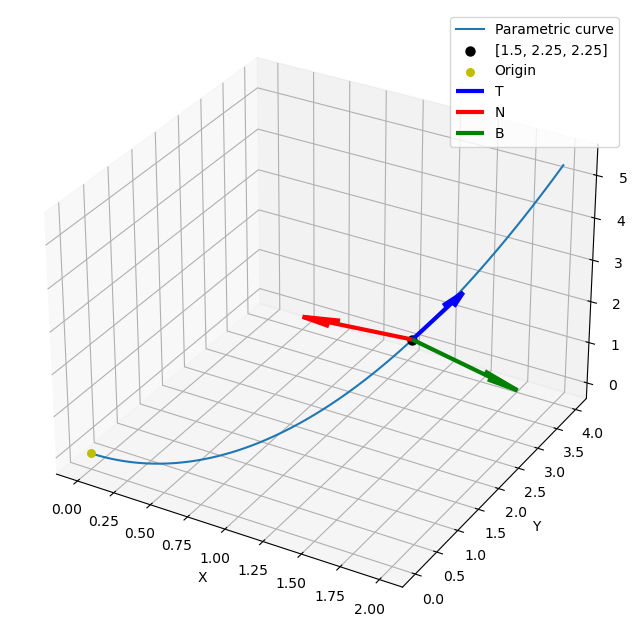

The point on the curve at the parameter value t= 1.5 is P = [1.5, 2.25, 2.25]


In [22]:
plt.rcParams["figure.figsize"] = (10,8)
ax = plt.figure().add_subplot(projection='3d')

# Axis limitations (if needed) 
#ax.set_xlim3d([-2.5, 2.5])        
#ax.set_ylim3d([-2.5, 2.5])
#ax.set_zlim3d([-2, 1])

# Axis markings
ax.set_xlabel('X')                 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Prepare a list of parameter values for curve plotting
t = np.linspace(0, 2, 100)  # Parameter range, spacing
P = [t, t**2, (2/3*t**3)]                                   # Points on curve: FROM INPUT!
ax.plot(P[0], P[1], P[2], label='Parametric curve')
                                  
# Fixed point on the curve where parameter t = t0
t = t0          # Fixed parameter value given in input.
P = [round(t, 2), round(t**2, 2), round((2/3)*t**3, 2)]     # Calculate fixed point: FROM INPUT!

ax.scatter(P[0], P[1], P[2], color='k', linewidths=3, label = P) # Point on the curve
ax.scatter(0,0,0, color='y', linewidths=2, label = 'Origin')     # Origin

# Extract scalar components from T0, N0, B0 for quiver plotting
Pr = C.origin.locate_new('Pr', r0)          # New coordinate system; origin to r0
Vr = list(Pr.express_coordinates(C))        # List of components of vector r0
P1 = C.origin.locate_new('P1', T0)
V1 = list(P1.express_coordinates(C))
P2 = C.origin.locate_new('P2', N0)
V2 = list(P2.express_coordinates(C))
P3 = C.origin.locate_new('P3', B0)
V3 = list(P3.express_coordinates(C))

# Plotting vectors T, N and B (start point, components )
quiver1 = ax.quiver(P[0], P[1], P[2],  V1[0],V1[1],V1[2],  color='b', linewidths=3, label = 'T')
quiver2 = ax.quiver(P[0], P[1], P[2],  V2[0],V2[1],V2[2],  color='r', linewidths=3, label = 'N')
quiver3 = ax.quiver(P[0], P[1], P[2],  V3[0],V3[1],V3[2],  color='g', linewidths=3, label = 'B')

ax.legend()
plt.show()
print('The point on the curve at the parameter value t=', t0, 'is P =', P)

In [23]:
# TNB-FUNKTIO calculates:
# Tangent, principal Normal, Binormal, Curvature, Radius of curvature, Torsion

# INIT
from sympy import *
from sympy.vector import CoordSys3D
t = symbols('t')                            # t is the parameter for the curve
C = CoordSys3D('C')                         # Defines a standard coordinate system


In [24]:
# TNB-FUNKTIO

# INPUT
P = [t, t**2, (2/3*t**3)]                   # Parametric curve  
t0 = 1.5                                    # Fixed value for parameter t

# Evaluation of an expression where parameter t has a fixed value
def at_t0(expr, t0):                        # Evaluates the expression at the point where t=t0
    return expr.evalf(subs={t: t0 })

# Unit vectors Tangent, principal Normal and Binormal for a curve where parameter t = t0
def TNB(P, t0):                             # (parametric curve, parameter value)
    # Expressions
    r = P[0]*C.i + P[1]*C.j + P[2]*C.k      # Position vector the curve in CoordSys C.
    v = diff(r, t)                          # dr/dt gives the tangential velocity v (if t is time)
    norm_v = sqrt(v.dot(v))                 # norm_v = |dr/dt| (speed, magnitude of velocity)
    T = v/norm_v                            # T = dr/ds = (dr/dt)/(ds/dt) = (dr/dt)(|dr/dt|)
    dT_dt = diff(T, t)                      # perpendicular to T
    dT_ds = dT_dt/norm_v                    # dT/ds=(dT/dt)/(ds/dt)=(dT/dt)/|dr/dt|, s= arc lenght 
    k = sqrt(dT_ds.dot(dT_ds))              # Curvature k = |dT/ds|
    N = (1/k)*dT_ds                         # Principal normal
    B = T.cross(N)                          # Binormal
    dB_dt = diff(B, t)                      # dB/ds = (dB/dt)/(ds/dt) = dB/dt)/|dr/dt| 
    dB_ds = dB_dt/norm_v                    # norm_v = |dr/dt| 
    tau = (sqrt(dB_ds.dot(dB_ds)))          # Torsion  tau = |dB_ds|
    # At fixed point
    T0 = at_t0(T, t0)
    k0 = at_t0(k, t0)                       # Curvature 
    rho0 = 1/k0                             # Radius of curvature
    N0 = at_t0(N, t0)
    B0 = at_t0(B, t0)                       
    tau0 = at_t0(tau, t0)                   # Torsion
    return T0, N0, B0, k0, rho0, tau0
   
T0, N0, B0, k0, rho0, tau0 = TNB(P,t0 )    # Function call (curve, fixed t) 
P0 = [at_t0(P[0], t0), at_t0(P[1], t0), at_t0(P[2], t0) ]

print('Parameter value t0 =', t0)
print('Fixed point P0 =', P0)
print('Unit tangent T0 =', T0)
print('Principal normal N0 =', N0)
print('Binormal B0 =', B0)
print('Curvature k0 =', round(k0,3))
print('Radius of curvature rho0 =', round(rho0,3))
print('Torsion tau0 =', round(tau0,3))

Parameter value t0 = 1.5
Fixed point P0 = [1.50000000000000, 2.25000000000000, 2.25000000000000]
Unit tangent T0 = 0.181818181818182*C.i + 0.545454545454545*C.j + 0.818181818181818*C.k
Principal normal N0 = (-0.545454545454545)*C.i + (-0.636363636363636)*C.j + 0.545454545454545*C.k
Binormal B0 = 0.818181818181818*C.i + (-0.545454545454545)*C.j + 0.181818181818182*C.k
Curvature k0 = 0.066
Radius of curvature rho0 = 15.125
Torsion tau0 = 0.066
